<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

### pyplot Interface

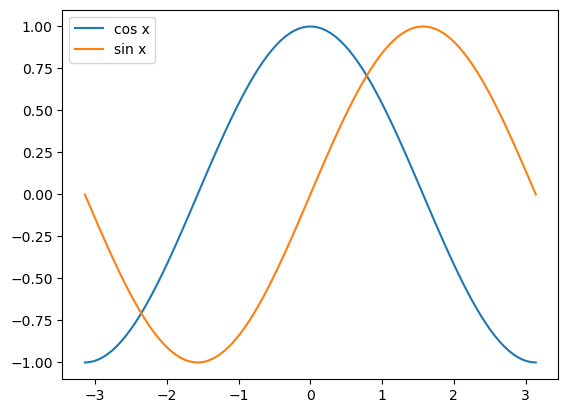

In [6]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()


### OO Interface

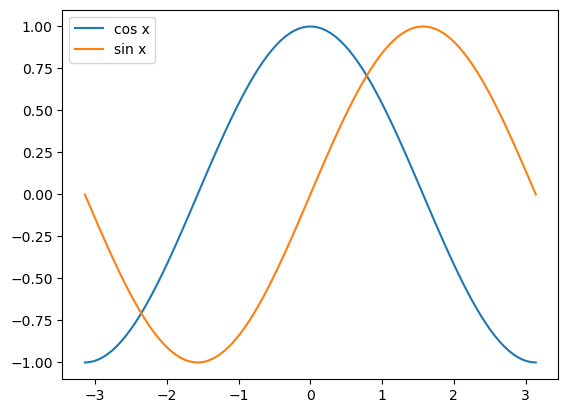

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

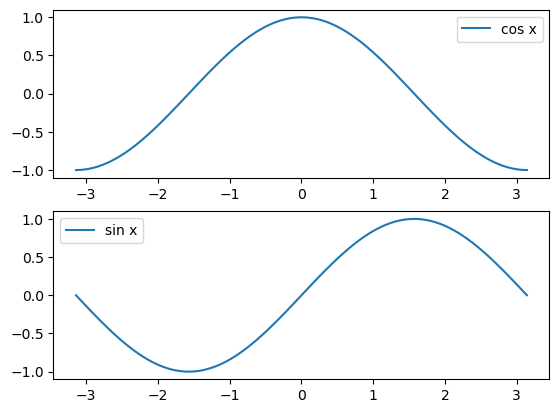

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

# 4 A complete OO example

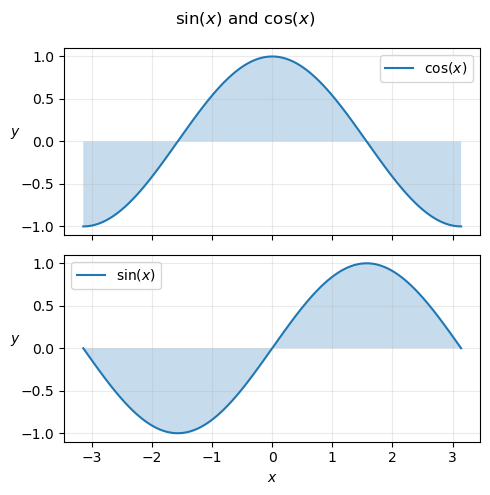

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

# 5 Multiple rows and columns

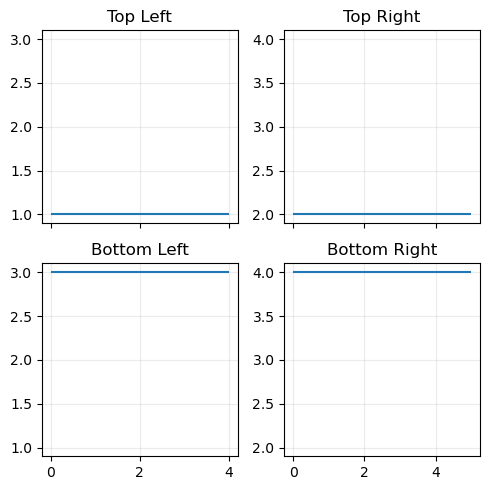

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

In [11]:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

## 5.1 Sharing axes

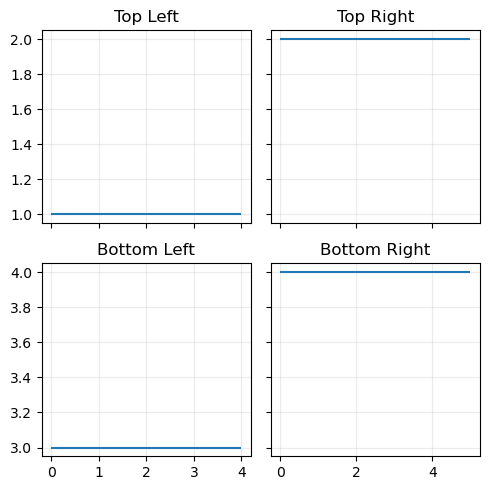

In [14]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.2 Accessing all axes

In [15]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

In [16]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

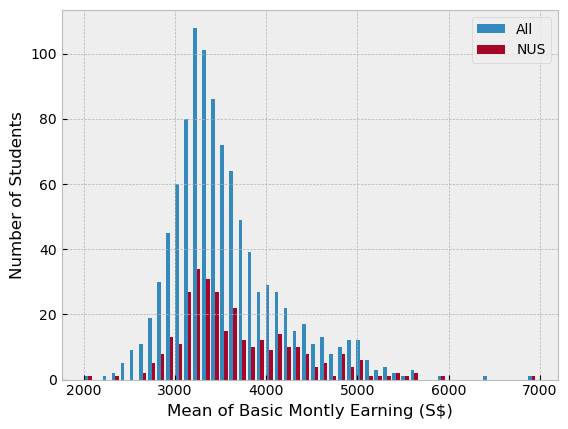

In [17]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

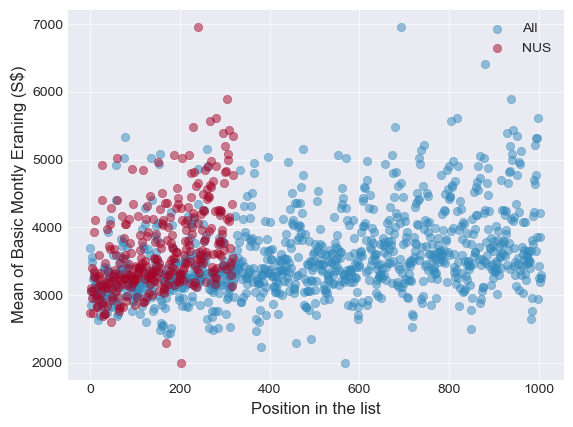

In [18]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

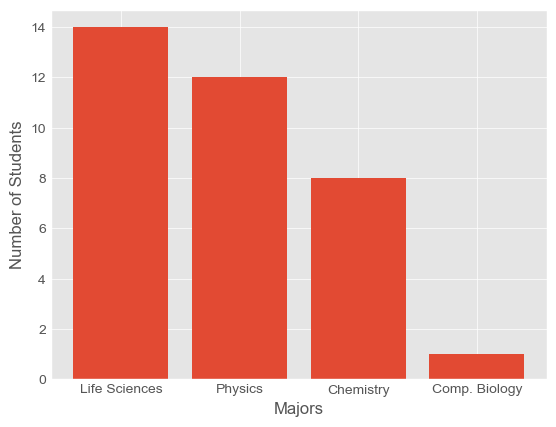

In [19]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

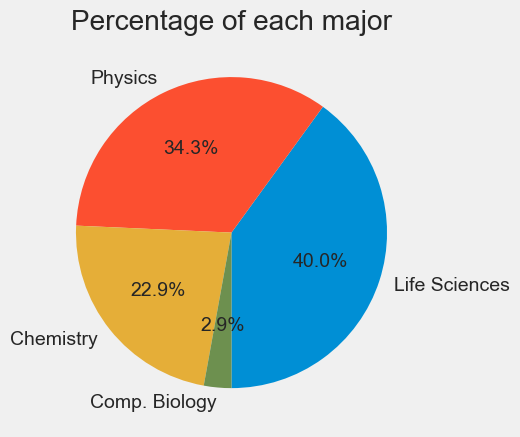

In [20]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')

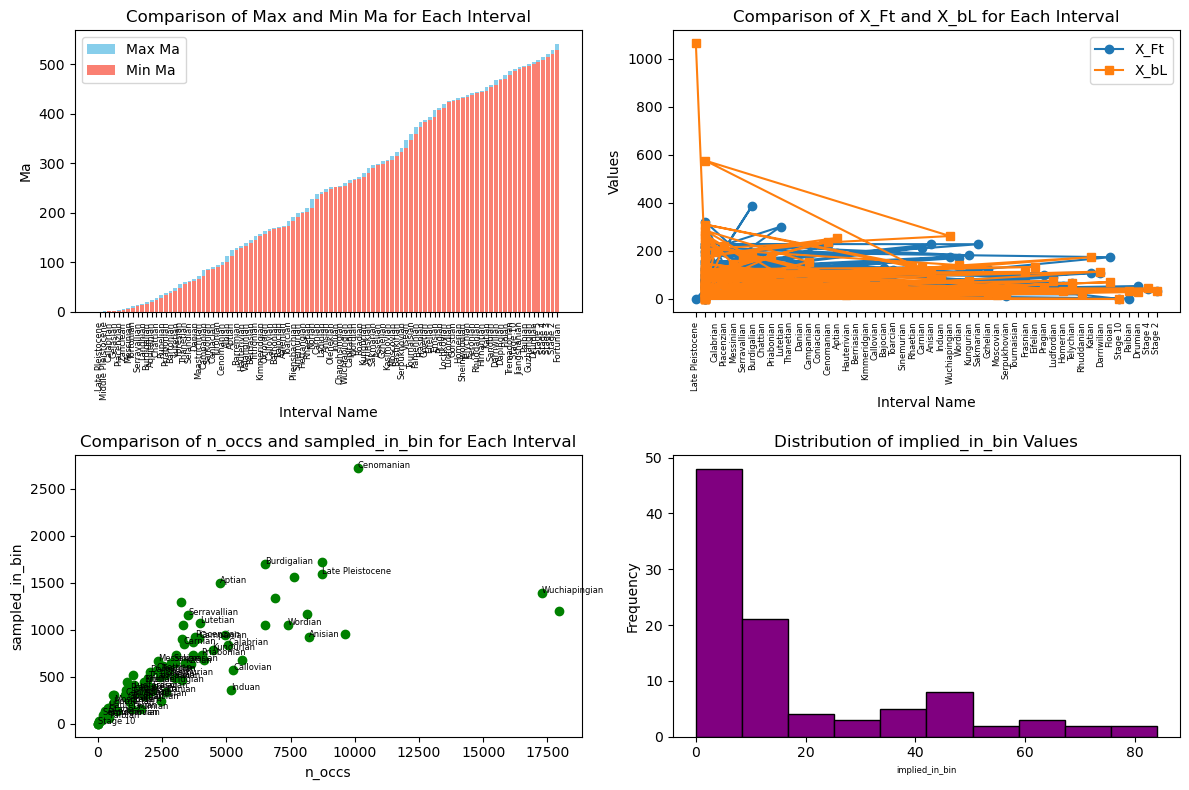

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('pbdb_data.csv')

# Visualize the data with small font size and downward extension of x-axis labels
plt.figure(figsize=(12, 8))

# Bar graph with small font size and downward extension of x-axis labels
plt.subplot(2, 2, 1)
plt.bar(data['interval_name'], data['max_ma'], color='skyblue', label='Max Ma')
plt.bar(data['interval_name'], data['min_ma'], color='salmon', label='Min Ma')
plt.xticks(rotation=90, ha='center', fontsize=6)  # Rotate x-axis labels vertically with small font size
plt.xlabel('Interval Name')
plt.ylabel('Ma')
plt.title('Comparison of Max and Min Ma for Each Interval')
plt.legend()

# Line plot with small font size and downward extension of x-axis labels
plt.subplot(2, 2, 2)
grouped_intervals = [data['interval_name'][i] if i % 2 == 0 else '' for i in range(len(data))]
plt.plot(grouped_intervals, data['X_Ft'], marker='o', label='X_Ft')
plt.plot(grouped_intervals, data['X_bL'], marker='s', label='X_bL')
plt.xticks(rotation=90, ha='center', fontsize=6)  # Rotate and group x-axis labels vertically with small font size
plt.xlabel('Interval Name')
plt.ylabel('Values')
plt.title('Comparison of X_Ft and X_bL for Each Interval')
plt.legend()

# Scatter plot with small font size and downward extension of x-axis labels
plt.subplot(2, 2, 3)
plt.scatter(data['n_occs'], data['sampled_in_bin'], color='green')
for i, txt in enumerate(data['interval_name']):
    if i % 2 == 0:  # Display every other label to reduce overlap
        plt.annotate(txt, (data['n_occs'][i], data['sampled_in_bin'][i]), fontsize=6)
plt.xlabel('n_occs')
plt.ylabel('sampled_in_bin')
plt.title('Comparison of n_occs and sampled_in_bin for Each Interval')

# Histogram with small font size and downward extension of x-axis labels
plt.subplot(2, 2, 4)
plt.hist(data['implied_in_bin'], bins=10, color='purple', edgecolor='black')
plt.xlabel('implied_in_bin', fontsize=6)
plt.ylabel('Frequency')
plt.title('Distribution of implied_in_bin Values')

plt.tight_layout()
plt.savefig('Paleo_Diversity_Asia_Africa.png')
plt.show()